<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:** Michelle J. Kim, Ian Reinert

#### Business Problem
Statistics about data scientist salaries are widely propogated without much context. We examine what influences Data Scientist salaries and it's oveerall changes over time as supply begins to meet demand. We examine salaries across industries, titles, and location to help aspiring Data Scientists evaluate compensation offers.

#### Analysis
<b>Data</b>: Employers hiring international workers must submit an application for H1B visas with the US Deptartment of Labor. Data from these applications are available at H1Bdata.info including salary, location, and company information from 2012 to March of 2019. 

More info on web scraping: SalaryDataScraper.ipynb

<b>Caveats:</b>
This data is self-reported. Salaries are both estimates of what the employer plans to compensate prospective employees as well as what is actually paid, the latter likelier in the case of a visa renewal. 

We <u>assume</u> that the effect of geography, industry, and title are similar within visa applicants are similar to impacts on salaries for US citizens, even though salaries may differ between the two group. Unfortunately, the latter difference cannot be tested with this analysis.

#### Hypthoses
To answer this, we attempt to answer three hypotheses for each year for 2017, 2018, and 2019 (a total of 9 hypotheses). <br/>
H0: The mean salary of all roles are equal <br/>
H1: The mean salary of all roles at least one month group is different <br/>

H0: The mean salary of all regions are equal <br/>
H1: The mean salary of at least one region is different <br/>

H0: There is no interaction between the role and region <br/>
H1: There is interaction between the role and region <br/>

In [7]:
import pandas as pd
import data_cleaning as dc
import matplotlib.pyplot as plt
import seaborn as sns
import visualizations as viz
import statsmodels.api as sm
from statsmodels.formula.api import ols


# dirty_data = pd.read_csv('./data/dirty_data.csv')
clean = dc.full_clean()
clean.head()

,company,location,role,salary,startdate,status,submitdate,year,region,industry
0,THE MATLEN SILVER GROUP INC,"CHARLOTTE, NC",DATA SCIENTIST,170000,01/05/2015,CERTIFIED,12/12/2014,2014,OTHER,OTHER
1,THOUGHTWORKS INC,"CHICAGO, IL",DATA SCIENTIST,71718,09/29/2014,CERTIFIED,09/29/2014,2014,OTHER,OTHER
2,EVANTAGE SOLUTIONS INC,"BELLEVUE, WA",DATA SCIENTIST,73923,12/15/2014,CERTIFIED,12/15/2014,2014,OTHER,OTHER
3,HOTWIRE INC,"BELLEVUE, WA",DATA SCIENTIST,74755,10/20/2014,CERTIFIED,10/08/2014,2014,OTHER,TECH
4,FINO CONSULTING LLC,"NEW YORK, NY",DATA SCIENTIST,82000,10/20/2014,CERTIFIED,10/16/2014,2014,NYC,CONSULTING


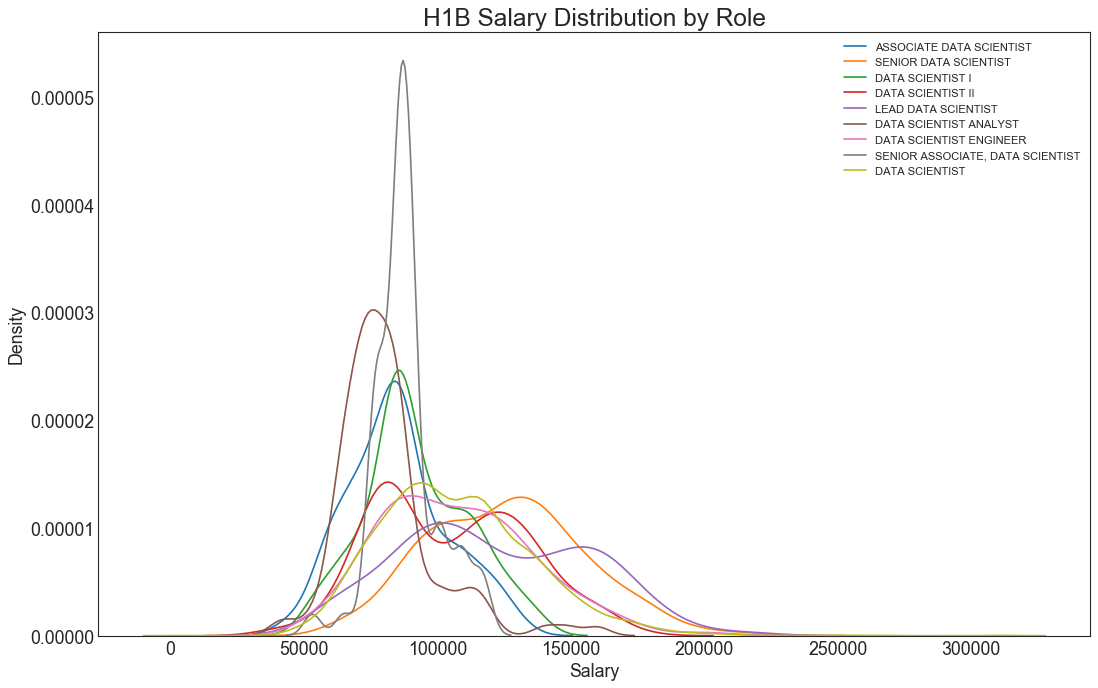

In [3]:
fig = viz.visualization_one(clean)

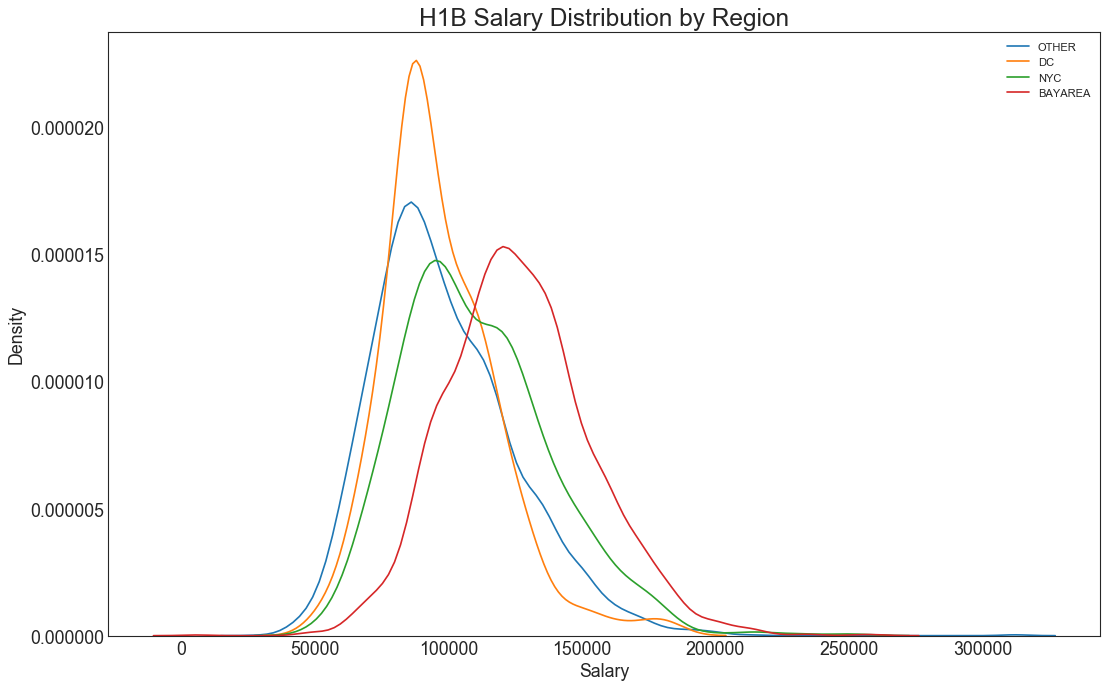

In [4]:
# input_vars = set(list(clean['Role']))
fig = viz.visualization_two(clean)

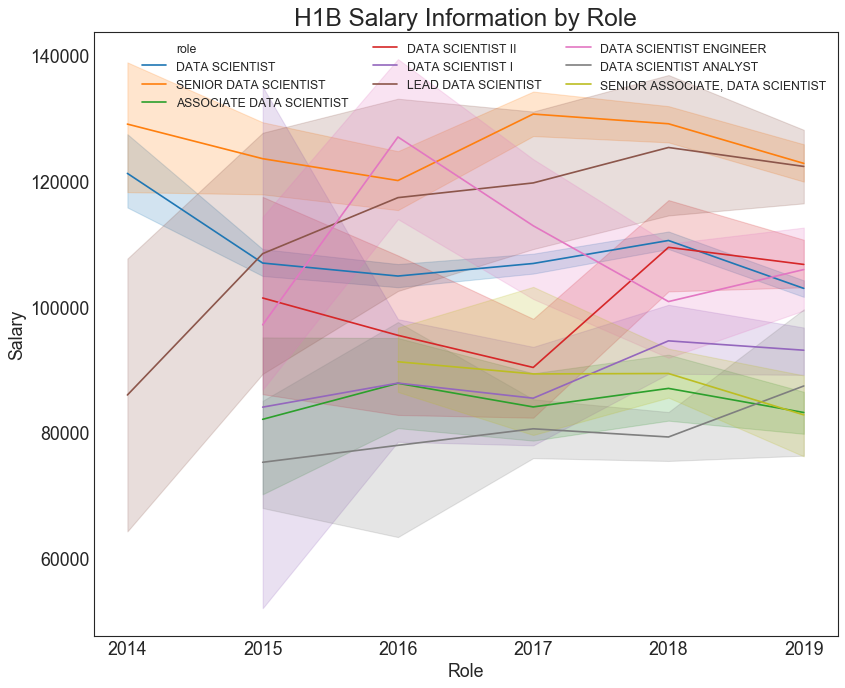

In [5]:
fig = viz.visualization_three(clean)

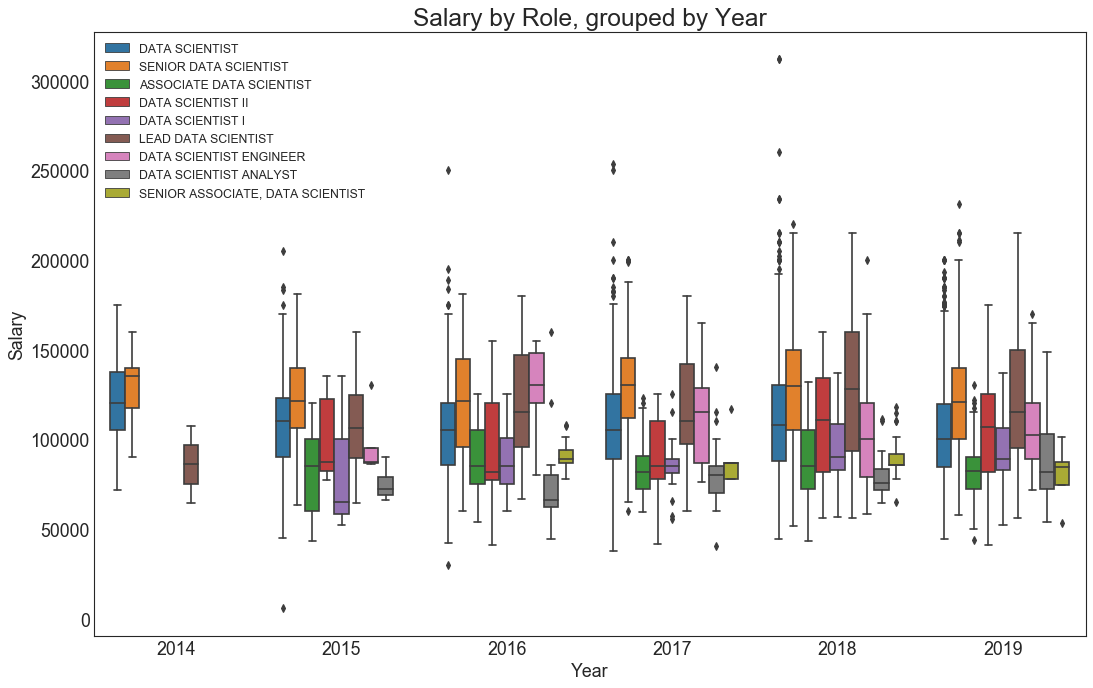

In [6]:
fig = viz.visualization_four(clean)

To increase the power of our analysis, we got rid of outliers, focused on the three most recent three years 2017-2019 (both the most relevant and over 50% of our data), and the four most popular positions: "Lead Data Scientist," "Associate Data Scientist," "Senior Data Scientist," and "Data Scientist."

Even with this selection of 3 years and 4 roles, we were not able to complete a two-way ANOVA using all our data (our data did not satisfy the assumption of normally distribution for each combination of variables and the appropriate method is beyond the scope of this analysis). We were able to roughly answer the first two hypotheses for each year.

#### Findings & Application

<em> Hypothesis one:</em><br>

<b>H1<sub>role</sub>: The mean salary of at least one role is significantly different.<br></b>
<b>    
All roles are significantly different except for Lead Data Scientists and Senior Data Scientists.</b>

<em> Hypothesis Two:</em><br>

<b>H1<sub>region</sub>: The mean salary of at least one region is significantly different.<br></b>


Unlike roles, regional differences seem to be more mixed, however, we can draw three conclusions from our second hypothesis test:

<b>
1) The Bay Area remains significantly different thoughout all years.<br>
    
2) NYC's foreign data scientists' average salary has only become significantly different from DC's since 2018.<br>
    
3) DC's foreign data scientist market remains similar to other markets (possibly less mature).</b>

#### Limitations

1) <em>Interaction</em>: We would like to look at our third hypothesis question: how do role and region affect each other?

2) <em>Effect size</em>: We would like to know statistically how much more salaries are in the Bay Area and NYC as compared to DC and the rest of the country.

#### Next Steps
Welch's two-way ANOVA in python.